<a href="https://colab.research.google.com/github/dsmohiit/Machine-Learning-Repo/blob/main/AUC_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop("Outcome", axis= 1)
y = df["Outcome"]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [10]:
model_lr = LogisticRegression(max_iter= 1000)

In [11]:
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_probability_score = model_lr.predict_proba(X_test)[:, 1]

In [17]:
y_probability_score

array([0.27587171, 0.18844086, 0.11448808, 0.16354446, 0.47152763,
       0.44181565, 0.01545949, 0.66077894, 0.54146137, 0.77733211,
       0.25591838, 0.89734144, 0.3362008 , 0.30303447, 0.08198096,
       0.38092464, 0.13935392, 0.07479528, 0.86674191, 0.56143057,
       0.20841338, 0.07739483, 0.53962428, 0.0945844 , 0.5394989 ,
       0.88554595, 0.12431327, 0.03016297, 0.25152958, 0.11581437,
       0.91112978, 0.87075938, 0.76536041, 0.83753319, 0.61668745,
       0.68328935, 0.96813003, 0.24363738, 0.51147551, 0.73613825,
       0.06983479, 0.59412645, 0.58366935, 0.32718599, 0.02759122,
       0.50239275, 0.6393479 , 0.22533799, 0.36056256, 0.95629563,
       0.04889599, 0.66096112, 0.8116769 , 0.24552928, 0.09325806,
       0.04152087, 0.7781665 , 0.0057039 , 0.40861817, 0.75696165,
       0.74134846, 0.35194245, 0.19236789, 0.20492144, 0.07688254,
       0.62716494, 0.0509161 , 0.7328617 , 0.03691982, 0.71593403,
       0.67523613, 0.07016495, 0.18115143, 0.11430304, 0.09115

In [20]:
fpr, tpr, threshold = roc_curve(y_test, y_probability_score)

In [21]:
threshold

array([       inf, 0.97115521, 0.96813003, 0.95629563, 0.90262249,
       0.89734144, 0.80096521, 0.7781665 , 0.77789864, 0.77733211,
       0.7328617 , 0.72427692, 0.68328935, 0.67523613, 0.66096112,
       0.66077894, 0.6555798 , 0.64967188, 0.6393479 , 0.61668745,
       0.60581059, 0.58366935, 0.55036457, 0.5394989 , 0.53417122,
       0.50297386, 0.50239275, 0.42044193, 0.42015964, 0.40861817,
       0.38092464, 0.33903877, 0.32718599, 0.30303447, 0.30268011,
       0.25731429, 0.24066279, 0.22533799, 0.2251495 , 0.20841338,
       0.20492144, 0.16354446, 0.14043101, 0.12822715, 0.12698331,
       0.11448808, 0.11430304, 0.04152087, 0.04047859, 0.00417295])

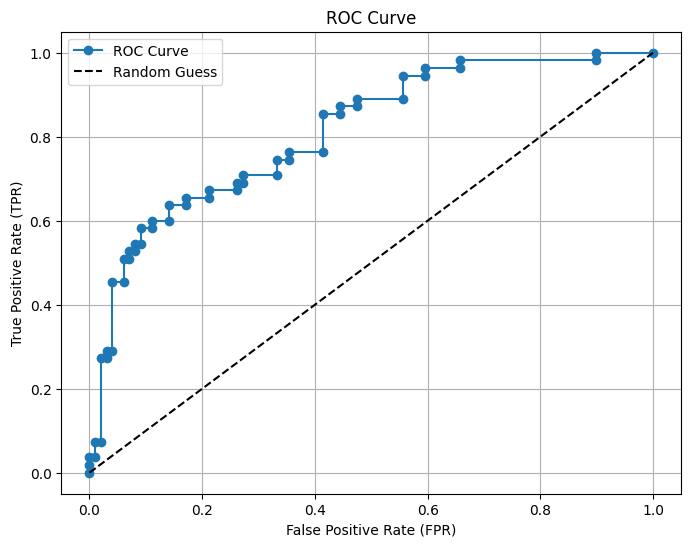

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)
plt.legend()

In [36]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.5503645724616164
